# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

WEB SCRAPPING

In [4]:
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from string import digits
import requests
import pandas as pd
import string
import seaborn as sns
import re
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


CLEANING DATA

In [ ]:
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [ ]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | My family and I have flown ...
freq,1


No null values

We will split the reviews into 2 rows to separate the verification from the review

In [ ]:
new = df["reviews"].str.split("|", n = 0, expand = True)

df["Verification"]= new[0]

df["review"]= new[1]

df.drop(columns =["reviews"], inplace = True)

df

,Verification,review
0,✅ Trip Verified,My family and I have flown mostly on British...
1,✅ Trip Verified,This has been by far the worst service I hav...
2,✅ Trip Verified,In Nov 2022 I booked and paid for a return j...
3,Not Verified,BA is not treating its premium economy passen...
4,✅ Trip Verified,24 hours before our departure on BA059 to Ca...
...,...,...
995,Not Verified,Glasgow to Miami via London. Glasgow to Heat...
996,✅ Trip Verified,London Heathrow to Budapest. After so much d...
997,✅ Trip Verified,Budapest to London Heathrow. The flight depa...
998,✅ Trip Verified,London to Toronto. Group of 10 people age fr...


We will only keep the verified trips

In [ ]:
df = df[df["Verification"].str.contains("✅ Trip Verified") == True]
df

,Verification,review
0,✅ Trip Verified,My family and I have flown mostly on British...
1,✅ Trip Verified,This has been by far the worst service I hav...
2,✅ Trip Verified,In Nov 2022 I booked and paid for a return j...
4,✅ Trip Verified,24 hours before our departure on BA059 to Ca...
5,✅ Trip Verified,We arrived at Heathrow at 0600 to find our f...
...,...,...
994,✅ Trip Verified,Hamburg to London. Initial flight from Londo...
996,✅ Trip Verified,London Heathrow to Budapest. After so much d...
997,✅ Trip Verified,Budapest to London Heathrow. The flight depa...
998,✅ Trip Verified,London to Toronto. Group of 10 people age fr...


In [ ]:
df = df.drop ('Verification', axis=1)
df

,review
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
4,24 hours before our departure on BA059 to Ca...
5,We arrived at Heathrow at 0600 to find our f...
...,...
994,Hamburg to London. Initial flight from Londo...
996,London Heathrow to Budapest. After so much d...
997,Budapest to London Heathrow. The flight depa...
998,London to Toronto. Group of 10 people age fr...


Sentiment Analaysis

In [ ]:
df['review'] = df['review'].str.replace('[^\w\s]','')
print(df['review'])

0        My family and I have flown mostly on British...
1        This has been by far the worst service I hav...
2        In Nov 2022 I booked and paid for a return j...
4        24 hours before our departure on BA059 to Ca...
5        We arrived at Heathrow at 0600 to find our f...
                             ...                        
994      Hamburg to London Initial flight from London...
996      London Heathrow to Budapest After so much di...
997      Budapest to London Heathrow The flight depar...
998      London to Toronto Group of 10 people age fro...
999      Madrid to Heathrow I fly with BA on a regula...
Name: review, Length: 801, dtype: object


<ipython-input-124-a89e6e492c50>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]','')


In [ ]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None


def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df['polarity'] = df['review'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal)


print(df)

                                                review  polarity       tag
0      My family and I have flown mostly on British...  0.125269  Positive
1      This has been by far the worst service I hav... -0.074519  Negative
2      In Nov 2022 I booked and paid for a return j...  0.080073  Positive
4      24 hours before our departure on BA059 to Ca... -0.032217  Negative
5      We arrived at Heathrow at 0600 to find our f... -0.200000  Negative
..                                                 ...       ...       ...
994    Hamburg to London Initial flight from London... -0.150000  Negative
996    London Heathrow to Budapest After so much di...  0.093750  Positive
997    Budapest to London Heathrow The flight depar...  0.037500  Positive
998    London to Toronto Group of 10 people age fro...  0.237941  Positive
999    Madrid to Heathrow I fly with BA on a regula... -0.147000  Negative

[801 rows x 3 columns]


In [ ]:
(df.groupby('tag').size()/df['tag'].count())*100

tag
Negative    34.332085
Neutral      0.998752
Positive    64.669164
dtype: float64

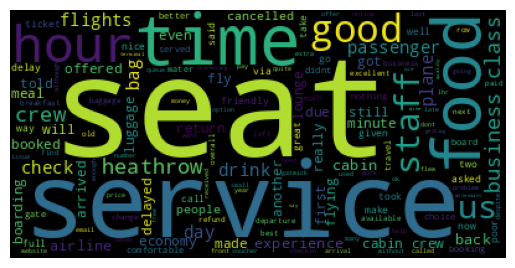

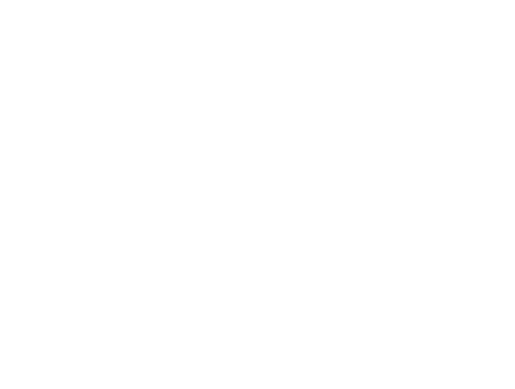

In [ ]:
STOPWORDS.add('airlines')
STOPWORDS.add('airways')
STOPWORDS.add('trip')
STOPWORDS.add('ba')
STOPWORDS.add('aircraft')
STOPWORDS.add('airport')
STOPWORDS.add('flight')
STOPWORDS.add('london')
STOPWORDS.add('one')
STOPWORDS.add('british')

text = ''

for row in df.review.values:
  text = text + row.lower() + ' '

wc = WordCloud(max_words=2000, stopwords=STOPWORDS)

wc.generate(text)

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

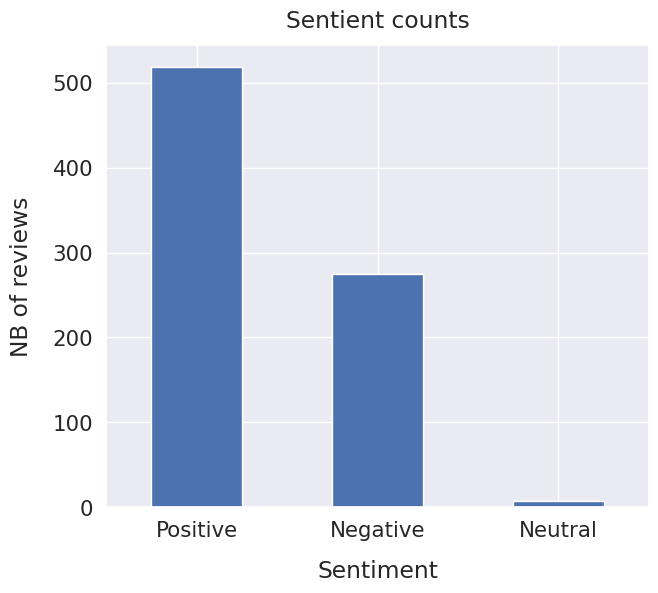

In [ ]:
df['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("NB of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);